# Project: Investigate Movies Popularity
## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction


In [1]:
#add libraries used
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

# Use this cell to set up import statements for all of the packages that you
#   plan to use.

#upload the files and read them
mov_df=pd.read_csv('tmdb-movies.csv')


<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [2]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
mov_df.head(3)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08


In [3]:
#check for stat info
mov_df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [4]:
#check for blanks
mov_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1


### Data Cleaning 

In [17]:
###clean movies with runtime == 0
####mov_df0 = mov_df[mov_df.runtime != 0]
#The above was changed as per last review (they were left the first time as decided to clean only rows that are missing data under investigation to work with more data)

#Remove any row with 0
mov_df0 = mov_df.replace(0, np.nan)
mov_df0 = mov_df0.dropna(how='all', axis=0)
#Test no more 0
mov_df0.min()

id                       5
popularity         6.5e-05
budget                   1
revenue                  2
original_title    $5 a Day
runtime                  2
release_date        1/1/00
vote_count              10
vote_average           1.5
release_year          1960
budget_adj        0.921091
revenue_adj        2.37071
dtype: object

In [6]:
#change release_date into datetime
mov_df0['release_date']= pd.to_datetime(mov_df0['release_date'])
 
# Check the format of 'Date' column
mov_df0.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  5170 non-null float64
revenue                 4850 non-null float64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10835 non-null float64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null datetime64[ns]
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj   

<a id='eda'></a>
## Exploratory Data Analysis

### Relationship between Votes and Runtime

In [7]:
mov_df5=mov_df0.groupby('runtime').vote_average.mean().reset_index(name='Avg_Vote')
mov_df5.head()


,runtime,Avg_Vote
0,2.0,6.620000
1,3.0,6.800000
2,4.0,6.811765
3,5.0,7.058824
4,6.0,7.013636


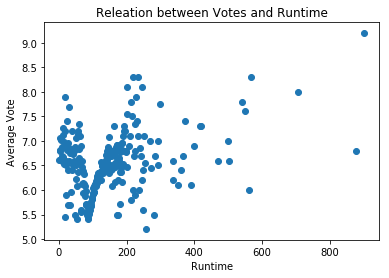

In [19]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.
y= mov_df5['Avg_Vote']
x=mov_df5['runtime']
plt.ylabel("Average Vote") 
plt.xlabel("Runtime") 
plt.title('Releation between Votes and Runtime')
plt.scatter(x, y);

As show in the above figure, the highest votes went for the longest movie (900min) while the average for the sample examined is 152 min with av votes of 6.5


In [9]:
mov_df5.describe()

,runtime,Avg_Vote
count,246.000000,246.000000
mean,152.337398,6.542871
std,132.497501,0.619046
min,2.000000,5.200000
25%,67.250000,6.132341
50%,128.500000,6.534234
75%,190.500000,6.847500
max,900.000000,9.200000


### Which release year has the most Votes 

In [10]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.
mov_df4=mov_df0.groupby('release_year').vote_average.mean().reset_index(name='Avg_Vote')
mov_df4.head()


,release_year,Avg_Vote
0,1960,6.325000
1,1961,6.374194
2,1962,6.343750
3,1963,6.329412
4,1964,6.211905


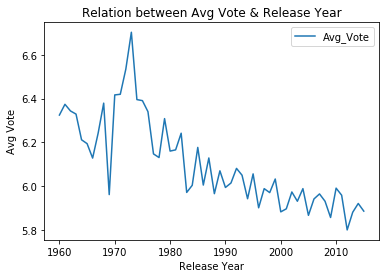

In [11]:
mov_df4.plot(x='release_year', y='Avg_Vote')
plt.title('Relation between Avg Vote & Release Year')
plt.ylabel('Avg Vote')
plt.xlabel('Release Year');

As show in the above figure,the average vote was 6.1, the highest votes within the examined sample were 2015 and least on 1960

In [12]:
#stats about the above chart chart
mov_df4.describe()

,release_year,Avg_Vote
count,56.000000,56.000000
mean,1987.500000,6.104772
std,16.309506,0.200001
min,1960.000000,5.799830
25%,1973.750000,5.960597
50%,1987.500000,6.041295
75%,2001.250000,6.242106
max,2015.000000,6.703636


In [13]:
#Count of movies release each year using raw data as there were no nan in years column 
mov_df3=mov_df.groupby('release_year').size().reset_index(name='counts')

mov_df3.head()

,release_year,counts
0,1960,32
1,1961,31
2,1962,32
3,1963,34
4,1964,42


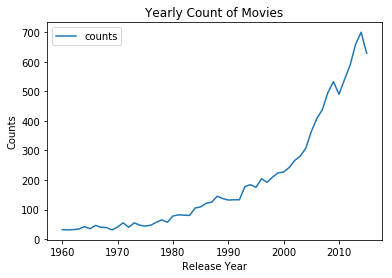

In [14]:
mov_df3.plot(x='release_year', y='counts')
plt.title('Yearly Count of Movies')
plt.ylabel('Counts')
plt.xlabel('Release Year');

As show in the above figure, the count of movies released kept increasing over timefrom 1960 till 2015(the highest with 700 movies) with slight exceptions then started to decrease afterwards

In [15]:
#Stats for the above chart
mov_df3.describe()

,release_year,counts
count,56.000000,56.000000
mean,1987.500000,194.035714
std,16.309506,188.011602
min,1960.000000,31.000000
25%,1973.750000,47.000000
50%,1987.500000,128.500000
75%,2001.250000,248.000000
max,2015.000000,700.000000


# Conclusion

Number of movies kept released kept increasing over time specially by the 21st century pleaking at 2015 with 700 movies while least was on 1960 with only 31 movies

The year 2015 had the highest average votes in all years with 8.3 average votes while 1961 scored the lowest with only 5.7 average votes
The preiod overall scored an average of 6.5 average votes

##Limitation
Some missing data and Zero values in the original data had to be excluded and many valuable column were not use used to avoid giving misleading information 


In [16]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0